An introduction to machine learning with scikit-learn
https://scikit-learn.org/stable/
https://scikit-learn.org/stable/tutorial/basic/tutorial.html

Supervised learning
https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

Unsupervised learning
https://scikit-learn.org/stable/unsupervised_learning.html

Neste notebook você concluirá seu primeiro projeto de Machine Learning usando Python. 

Um projeto de Machine Learning tem uma série de etapas bem conhecidas:

- Defina o problema.
- Prepare os dados.
- Avalie algoritmos.
- Melhore os resultados.
- Resultados finais.

Para começar faremos a classificação das flores íris.

- As características são numéricos, então você precisa descobrir como carregar e manipular os dados.
- É um problema de classificação, com rótulos previamente atribuídos.
- É um problema de classificação multi-classe que pode requerer algum tratamento especializado, como balanceamento de classes.
- Possui apenas 4 atributos e 150 linhas, o que significa que é pequeno e cabe facilmente na memória.
- Todos os atributos numéricos estão nas mesmas unidades e na mesma escala, não exigindo nenhuma escala ou transformação especial para começar.

Usaremos o conjunto de dados iris deste repositório: 
https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

# Importar libs Python

Primeiro, vamos importar todos os módulo, funções e objetos que vamos usar neste projeto.

In [1]:
# Load Libs

import pandas as pd
from pandas import DataFrame

import sklearn
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, MaxAbsScaler
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.model_selection import GridSearchCV 

import seaborn as sns 
import matplotlib.pyplot as plt

import joblib
import pickle as pck

Tudo deve carregar sem erros. Se você tiver um erro, pare. Instale as libs que ainda não estão instaladas, usando pip install <lib_name>

In [2]:
# Check as versões das libs python
 
# pandas
print('pandas: {}'.format(pd.__version__))
# scikit-learn
print('sklearn: {}'.format(sklearn.__version__))

pandas: 1.2.5
sklearn: 1.0.1


# Carregar o conjunto de dados

tbém podemos carregar diretamente da biblioteca sklearn.

In [3]:
iris = datasets.load_iris()
X, y = iris.data, iris.target

print('Dataset features names : '+str(iris.feature_names))
print('Dataset features size : '+str(iris.data.shape))
print('Dataset target names : '+str(iris.target_names))
print('Dataset target size : '+str(iris.target.shape))

Dataset features names : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Dataset features size : (150, 4)
Dataset target names : ['setosa' 'versicolor' 'virginica']
Dataset target size : (150,)


Para conjuntos de dados mais complexos pode ser necessário normalizar os dados, imputar valores ausentes, transformação de variáveis categóricas para numéricas, entre outras operações, para que o conjunto de dados esteja adequada para a entrada de uma Machine Learning. 

Para treinar alguns algoritmos de Machine Learning vamos usar a classe sklearn.pipeline.Pipeline() - Pipeline de transformações com um estimador final. 

O pipeline aplica sequencialmente uma lista de transformações e um estimador final. As etapas intermediárias do pipeline devem ser 'transformações', ou seja, devem implementar os métodos fit e transform. O estimador final só precisa implementar fit. 

O objetivo do pipeline é reunir várias etapas que podem ser validadas de forma cruzada ao definir parâmetros diferentes. 

A forma mais conhecida de escrever códigos de Machine Learning e a que é geralmente ensinada é usando paradigma de programação procedural, onde cada etapa do código é feita em sequência, seguindo uma ordem específica e usando funções proveninentes de pacotes ou escritas pelo próprio usuário. 

A classe Pipeline é uma funcionalidade do Scikit-Learn que ajuda a criar códigos que possuam um padrão que possa ser facilmente entendido e compartilhado entre times. Este tipo de escrever código usa o estilo de programação Orientada à Objetos.

A classe Pipeline nos permite embutir no modelo não apenas o algoritmo de Machine Learning, mas também a forma como ele irá pré-processar os dados. 

Vamos definir as etapas que irão compor o nosso pipeline. Na primeira etapa iremos padronizar os dados com média zero e variância 1 com StandardScaler e em seguida aplicar o modelo de classificação (para este exemplo usaremos uma Decision Tree. O objetivo é criar um modelo que preveja o valor de uma variável de alvo aprendendo regras de decisão simples inferidas a partir dos características dos dados. Simples de entender e interpretar. As árvores podem ser visualizadas.

https://scikit-learn.org/stable/modules/tree.html

O módulo sklearn.preprocessing fornece várias funções de utilidade comuns e classes de transformadores para alterar os vetores de caracteristícas brutos em uma representação mais adequada para os modelos.

Em geral, os algoritmos de aprendizado se beneficiam da padronização do conjunto de dados. Se alguns outliers estiverem presentes no conjunto, scalers ou transformadores robustos são mais apropriados. 

https://scikit-learn.org/stable/modules/preprocessing.html

A padronização de conjuntos de dados é um requisito comum para muitos modelos de Machine Learning implementados no scikit-learn; eles podem se comportar mal se as características individuais não se parecerem mais ou menos com dados padrão normalmente distribuídos: Gaussiano com média zero e variância unitária. 

O módulo preprocessing fornece a classe StandardScaler. 

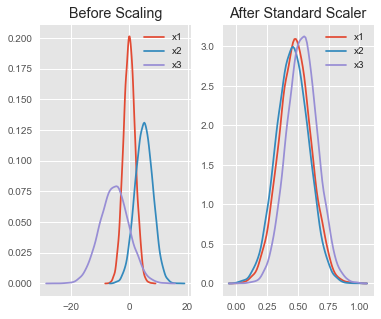

Parâmetros de um modelo de Machile Learning: são os argumentos da classe Python, por exemplo, número de camadas de uma rede neural, o tipo de camadas, o tipo de regularização.

Hiperparâmetros de um modelo de Machine learning: são os parâmetros treináveis do modelo, por exemplo, os pesos de uma rede neural, o vetores do SVM, a profundidade de uma Decision Tree, etc.

# Conjuntos de dados de treinamento e teste

In [4]:
# train_test_split separa os exemplos em train e test e embaralha! 
# A transformação e modelo Decison Tree estão com os seus parâmetros como padrão.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=None, random_state=0)

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(112, 4)
(112,)
(38, 4)
(38,)


In [6]:
pck.dump(X_test, open('X_test.pck', 'wb'))

pck.dump(y_test, open('y_test.pck', 'wb'))

In [7]:
steps = [('preprocessing', StandardScaler()),
    ('classifier', DecisionTreeClassifier(random_state=0)),
]
pipe = Pipeline(steps)

# O pipeline pode ser usado com qualquer outro estimador
# evita o vazamento do conjunto de teste no conjunto de treinamento

pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing', StandardScaler()),
                ('classifier', DecisionTreeClassifier(random_state=0))])

In [8]:
print('Training set score: ' + str(pipe.score(X_train,y_train)))
print('Test set score: ' + str(pipe.score(X_test,y_test)))

Training set score: 1.0
Test set score: 0.9736842105263158


In [9]:
set_config(display='diagram')
pipe  # clique no diagrama abaixo para ver os detalhes de cada etapa

Pipeline(steps=[('preprocessing', StandardScaler()),
                ('classifier', DecisionTreeClassifier(random_state=0))])

# Grid searchCV

Podemos procurar o melhor preprocessamento para o nosso conjunto de dados. Em vez de apenas usar StandardScaler() podemos testar MinMaxScaler(), Normalizer() e MaxAbsScaler().

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html

Podemos procurar o melhor valor para alguns parâmetros do modelo Decision Tree, como: 
- criterion = A função para medir a qualidade de uma divisão. Os critérios suportados são “gini” para a impureza Gini e “entropia” para o ganho de informação. 
- splitter = A estratégia usada para escolher a divisão em cada nó da árvore.
- max_depth = A profundidade máxima da árvore. 

https://scikitlearn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [10]:
DecisionTreeClassifier().get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [11]:
parameters = {'preprocessing': [StandardScaler(), MinMaxScaler(), Normalizer(), MaxAbsScaler()],
              'classifier__criterion': ['gini', 'entropy'],
              'classifier__max_depth': [10, 500, 10000]}

In [12]:
pipe.get_params()

{'memory': None,
 'steps': [('preprocessing', StandardScaler()),
  ('classifier', DecisionTreeClassifier(random_state=0))],
 'verbose': False,
 'preprocessing': StandardScaler(),
 'classifier': DecisionTreeClassifier(random_state=0),
 'preprocessing__copy': True,
 'preprocessing__with_mean': True,
 'preprocessing__with_std': True,
 'classifier__ccp_alpha': 0.0,
 'classifier__class_weight': None,
 'classifier__criterion': 'gini',
 'classifier__max_depth': None,
 'classifier__max_features': None,
 'classifier__max_leaf_nodes': None,
 'classifier__min_impurity_decrease': 0.0,
 'classifier__min_samples_leaf': 1,
 'classifier__min_samples_split': 2,
 'classifier__min_weight_fraction_leaf': 0.0,
 'classifier__random_state': 0,
 'classifier__splitter': 'best'}

O pipe junto com a lista de parâmetros acima são então passados para um objeto GridSearchCV(), que pesquisa no espaço de parâmetros o melhor conjunto de parâmetros, conforme mostrado abaixo:

In [13]:
grid = GridSearchCV(pipe, parameters)
grid.fit(X_train, y_train)

print('Training set score: ' + str(grid.score(X_train, y_train)))
print('Test set score: ' + str(grid.score(X_test, y_test)))

Training set score: 1.0
Test set score: 0.9736842105263158


In [14]:
# Access the best set of parameters
best_params = grid.best_params_
print(best_params)
# Stores the optimum model in best_pipe
best_pipe = grid.best_estimator_
print(best_pipe)

{'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'preprocessing': StandardScaler()}
Pipeline(steps=[('preprocessing', StandardScaler()),
                ('classifier',
                 DecisionTreeClassifier(max_depth=10, random_state=0))])


In [15]:
result_df = DataFrame.from_dict(grid.cv_results_, orient='columns')
result_df.shape

(24, 16)

In [16]:
result_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__criterion,param_classifier__max_depth,param_preprocessing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001434,0.000460,0.000000,0.000000,gini,10,StandardScaler(),"{'classifier__criterion': 'gini', 'classifier_...",1.000000,0.956522,1.000000,0.909091,0.954545,0.964032,0.033918,1
1,0.000639,0.000394,0.000399,0.000489,gini,10,MinMaxScaler(),"{'classifier__criterion': 'gini', 'classifier_...",1.000000,0.956522,1.000000,0.909091,0.954545,0.964032,0.033918,1
2,0.001008,0.000019,0.000189,0.000378,gini,10,Normalizer(),"{'classifier__criterion': 'gini', 'classifier_...",0.956522,0.913043,0.954545,0.909091,0.954545,0.937549,0.021671,19
3,0.000988,0.000025,0.000311,0.000406,gini,10,MaxAbsScaler(),"{'classifier__criterion': 'gini', 'classifier_...",1.000000,0.956522,1.000000,0.909091,0.954545,0.964032,0.033918,1
4,0.000982,0.000045,0.000220,0.000391,gini,500,StandardScaler(),"{'classifier__criterion': 'gini', 'classifier_...",1.000000,0.956522,1.000000,0.909091,0.954545,0.964032,0.033918,1


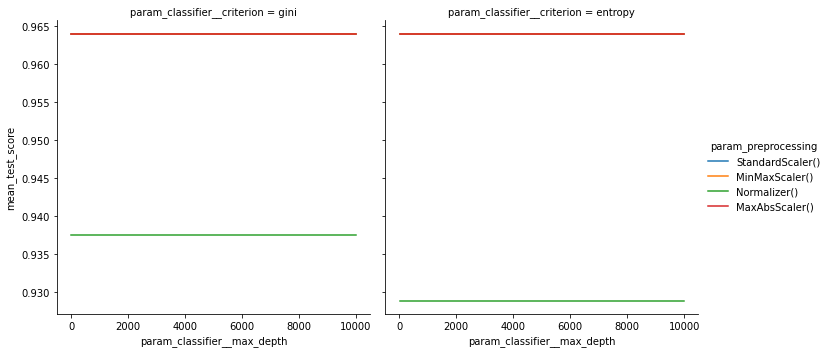

In [17]:
sns.relplot(data=result_df,
    kind='line',
    x='param_classifier__max_depth',
    y='mean_test_score',
    hue='param_preprocessing',
    col='param_classifier__criterion')
plt.show()

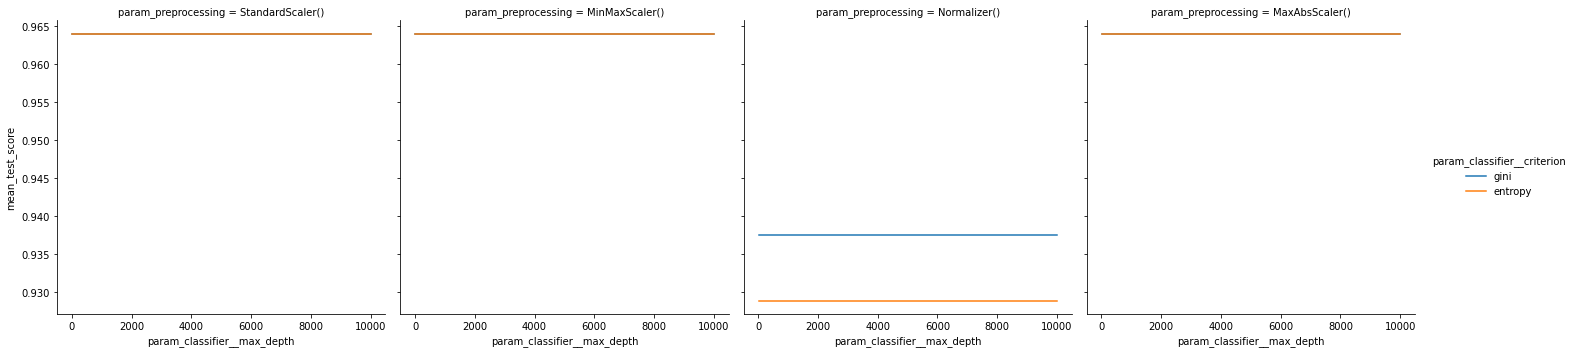

In [18]:
sns.relplot(data=result_df,
    kind='line',
    x='param_classifier__max_depth',
    y='mean_test_score',
    hue='param_classifier__criterion',
    col='param_preprocessing')
plt.show()

GridSearchCV automaticamente treina novamente o modelo em todo o conjunto de dados, a menos que você peça explicitamente para não fazer isso. Portanto, quando você treina o modelo GridSearchCV, o modelo usado para previsão (em outras palavras, o best_estimator_) já é treinado novamente em todo o conjunto de dado.

# vamos salvar o best_estimator

In [19]:
model = grid.best_estimator_

In [20]:
model

Pipeline(steps=[('preprocessing', StandardScaler()),
                ('classifier',
                 DecisionTreeClassifier(max_depth=10, random_state=0))])

In [21]:
# save the model to disk

pck.dump(model, open('DT_model_iris.pck', 'wb'))

# plot a decison tree treinada neste notebook

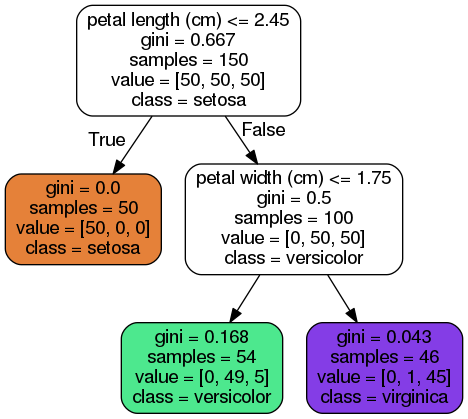